# Supervised and Unsuperviced Learning: Winsconsin Diagnostic Breast Cancer (WDBC) dataset

In [1]:
# ===========================================================================
#                              [Import libraries]
# ===========================================================================
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpl
import scipy
import sklearn

In [2]:
# ===========================================================================
#                              [Load dataset]
# ===========================================================================
Cancer = pd.read_csv(r"C:\Users\Ramatu's PC\Desktop\430pm\Cancerdata.csv")

In [3]:
# ===========================================================================
#                              [DATA CLEANING]
# ===========================================================================
# drop the ID column
Cancer.drop(['id'], axis=1, inplace = True)

#strip() takes out leading and trailing spaces
Cancer.columns.str.strip()

#View the first five rows
Cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# ===========================================================================
#                              [Explore Dataset]
# ===========================================================================
print('Count of data type in dataset')
Cancer.get_dtype_counts()


Count of data type in dataset


object      1
float64    30
dtype: int64

In [5]:
print('Shape of dataset')
Cancer.shape

Shape of dataset


(569, 31)

In [6]:
print('Check dataset for Null Values')
Cancer.isnull().sum() / Cancer.shape[0] 


Check dataset for Null Values


diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

In [7]:
print('Get Dataset information')
Cancer.info()
  

Get Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave 

In [8]:
print('Statistical description of the columns in the dataframe')
Cancer.describe()

Statistical description of the columns in the dataframe


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
print('Get the values count of the binary column')
Cancer["diagnosis"].value_counts()

Get the values count of the binary column


B    357
M    212
Name: diagnosis, dtype: int64

Plot of Histogram showing the distribution of each feature


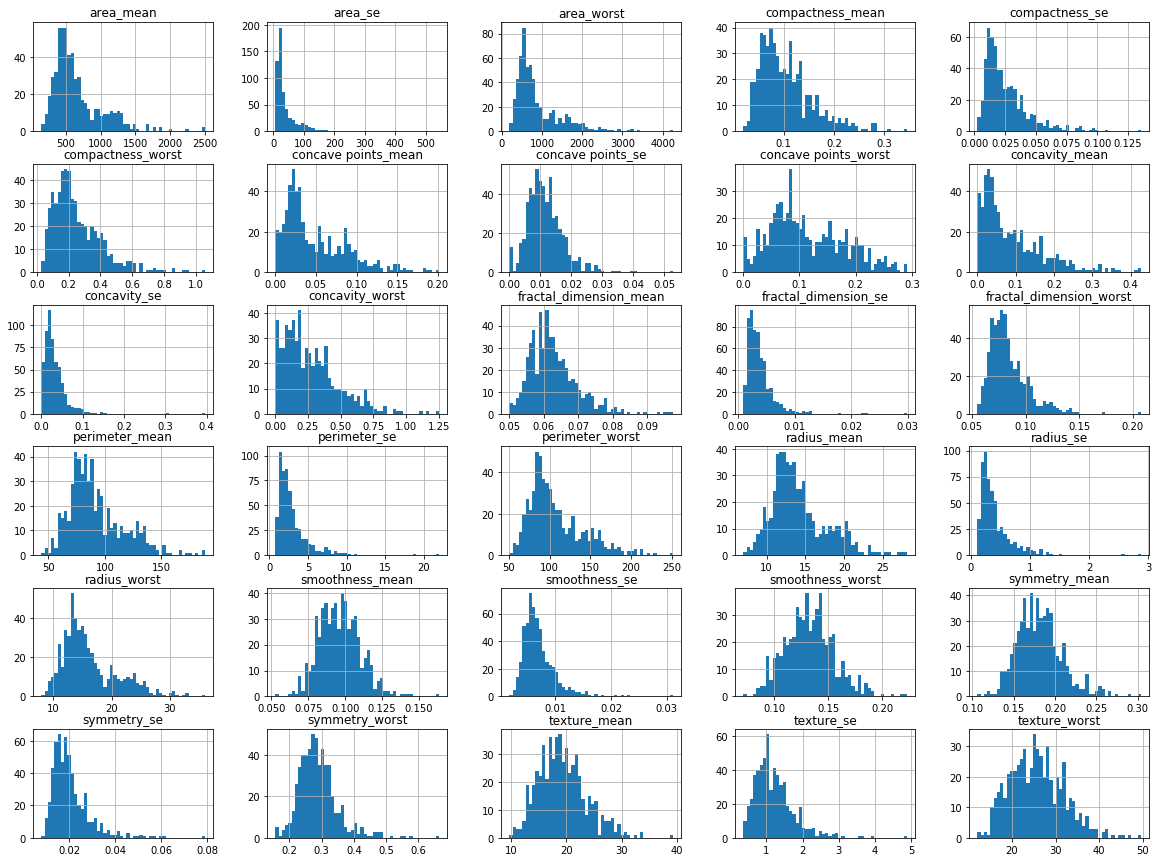

In [10]:
# ===========================================================================
#                              [Exploratory Analysis]
# ===========================================================================
print('Plot of Histogram showing the distribution of each feature')
Cancer.hist(bins=50, figsize=(20,15))
plt.show()

Visual representation of the correlation matrix ------Heatmap------


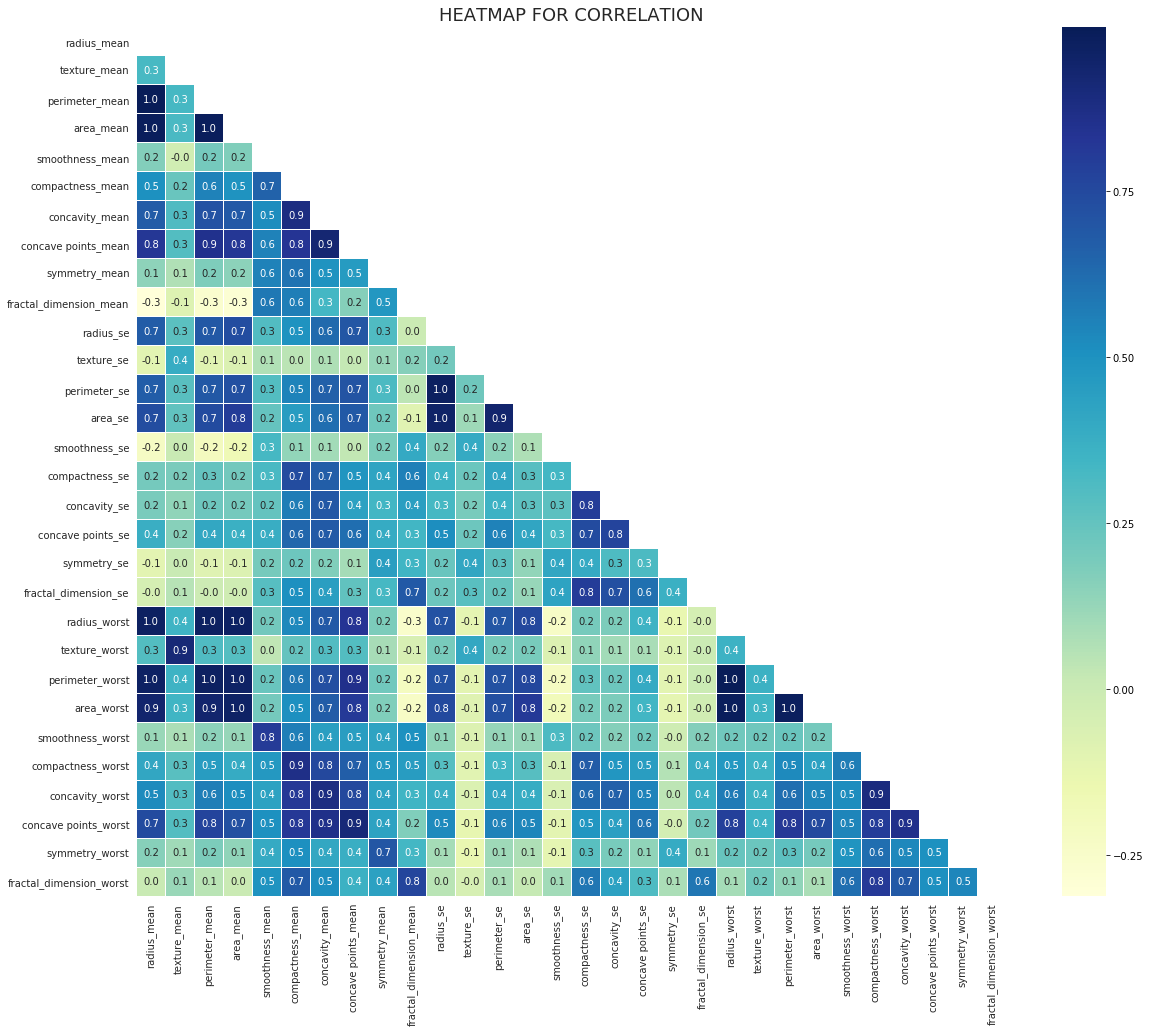

In [11]:
#Build the correlation table
corr = Cancer.corr()
print('Visual representation of the correlation matrix ------Heatmap------')
corr = corr [corr < 1] ## To avoid getting correlation of variable with themselves i.e value of 1 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f,ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="YlGnBu", linewidths=.5, mask = mask, ax=ax)
plt.title('HEATMAP FOR CORRELATION', size=18);


In [12]:
print('Encode the Categorical column--------[Done]')
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Diagnosis = Cancer["diagnosis"]
Diagnosis_encoded = encoder.fit_transform(Diagnosis)
Cancer["diagnosis"]=Diagnosis_encoded

Encode the Categorical column--------[Done]


In [13]:
# ===========================================================================
#                              [Predictive Analysis]
# ===========================================================================
# Seperate the y from the x columns
X = Cancer.drop('diagnosis',axis=1)
Y = Cancer['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.30, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


Applying dimensionality Reduction using Principal Component Analysis [PCA]
Best parameter (CV score=0.955):
{'m__criterion': 'entropy', 'm__max_depth': None, 'm__max_leaf_nodes': 10, 'm__min_samples_leaf': 5, 'm__min_samples_split': 2, 'pca__n_components': 15}


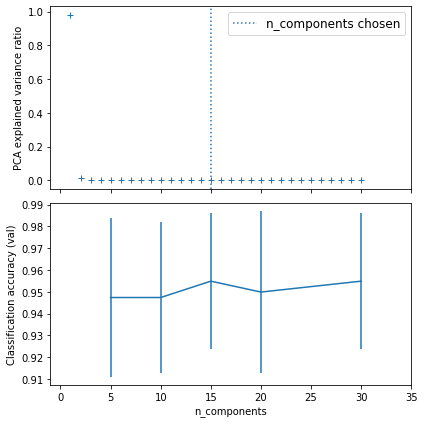

In [14]:
print('Applying dimensionality Reduction using Principal Component Analysis [PCA]')
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model1 = DecisionTreeClassifier(random_state=0)

pipe_dt = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model1)])


# set parameters of pipelines using ‘__’ separated parameter names:

param_grid = {"pca__n_components":[5, 10, 15, 20, 30],
              "m__criterion": ["gini", "entropy"],
              "m__min_samples_split": [2, 10, 20],
              "m__max_depth": [None, 2, 5, 10],
              "m__min_samples_leaf": [1, 5, 10],
              "m__max_leaf_nodes": [None, 5, 10, 20],
              }

search = GridSearchCV(pipe_dt, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_dt = search.fit(X_train, y_train)
#Get Best Parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 35)

plt.tight_layout()
plt.show()


In [15]:
#----------Test Best Parameters---------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time
t0 = time()
clf_dt =clf_dt.best_estimator_
y_pred_dt = clf_dt.predict(X_validation)
print("done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cv_dt = cross_val_score(clf_dt, X_train, y_train, cv=cv)

scores = cross_val_score(clf_dt, X_validation, y_validation, scoring='roc_auc', cv=cv, n_jobs=-1)


done in 0.006s


In [16]:
#---------Classification report--------
print ("----------------------> [DecisionTreeClassifier performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred_dt, y_validation)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_dt.mean(),
                                          scores_cv_dt.std()),
                                          end="\n\n" )
print(confusion_matrix(y_validation,y_pred_dt))
print(classification_report(y_validation,y_pred_dt))
print('Mean ROC AUC: %.3f' % scores.mean(), end="\n\n")
print('Misclassified examples: %d' % (y_validation != y_pred_dt).sum())
print('Misclassification/Error rate: %.3f' % ((y_validation != y_pred_dt).sum()/y_pred_dt.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_dt.score(X_validation, y_validation)))
print("Training set Accuracy: {:.3f}".format(clf_dt.score(X_train, y_train)))
print('--------------- DecisionTreeClassifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [DecisionTreeClassifier performance summary]
Accuracy: 0.953
mean: 0.946 (std: 0.034)

[[104   4]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Mean ROC AUC: 0.905

Misclassified examples: 8
Misclassification/Error rate: 0.127 %
Test set Accuracy: 0.953
Training set Accuracy: 0.982
--------------- DecisionTreeClassifier --Parameters specified-- : classifier.fit [Done]


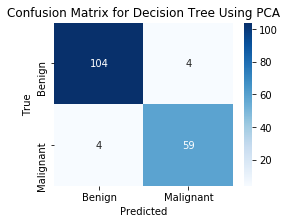

In [17]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_validation, y_pred_dt)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], 
            yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Decision Tree Using PCA");


Prediction accuracy for the standardized test dataset with PCA --DT
91.81%


PC 1 with:
 [0.22840435 0.11459603 0.23535896 0.23006804 0.13287554 0.23665125
 0.25728371 0.26063846 0.12980642 0.04072285 0.20668039 0.01403714
 0.21082108 0.20303925 0.00920246 0.16404168 0.15189164 0.17759851
 0.02342551 0.09062191 0.23340006 0.1129634  0.24101228 0.22996358
 0.12075504 0.20839579 0.23202745 0.24934109 0.11715877 0.12319076]

PC 2 with:
 [-0.21279079 -0.06584905 -0.1951508  -0.20926326  0.19756295  0.16214611
  0.06508838 -0.02336025  0.19063184  0.37857151 -0.09065476  0.10210316
 -0.07890224 -0.13730365  0.22275577  0.25267161  0.21665334  0.15427451
  0.18942265  0.30374253 -0.2080996  -0.06010889 -0.18944108 -0.20663622
  0.16229606  0.13041973  0.08349775 -0.01238619  0.10660055  0.27448168]


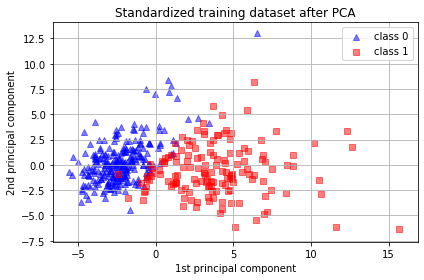

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt


FIG_SIZE = (10, 7)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_dt.fit(X_train, y_train)
pred_test_std = pipe_dt.predict(X_validation)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA --DT')
print('{:.2%}\n'.format(metrics.accuracy_score(y_validation, pred_test_std)))

# Extract PCA from pipeline
pca_std = pipe_dt.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_dt.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset after PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()

plt.show()

Applying dimensionality Reduction using Principal Component Analysis [PCA]
Best parameter (CV score=0.967):
{'m__n_neighbors': 5, 'pca__n_components': 10}


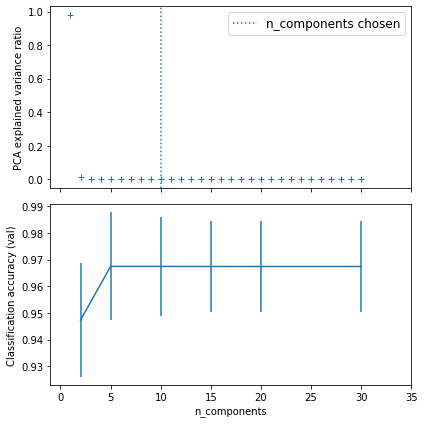

In [19]:
print('Applying dimensionality Reduction using Principal Component Analysis [PCA]')
from sklearn.neighbors import KNeighborsClassifier as KNN

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model2 = KNN()

pipe_knn = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model2)])


# set parameters of pipelines using ‘__’ separated parameter names:

param_grid  = {"pca__n_components": [2,5,10,15,20,30],
              'm__n_neighbors' : range(1, 15)}

search = GridSearchCV(pipe_knn, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_knn = search.fit(X_train, y_train)
#Get Best Parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 35)

plt.tight_layout()
plt.show()


In [20]:
#----------Test Best Parameters---------
t0 = time()
clf_knn =clf_knn.best_estimator_
y_pred_knn = clf_knn.predict(X_validation)
print("done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cv_knn = cross_val_score(clf_knn, X_train, y_train, cv=cv)

scores = cross_val_score(clf_knn, X_validation, y_validation, scoring='roc_auc', cv=cv, n_jobs=-1)


done in 0.047s


In [21]:
#---------Classification report--------
print ("----------------------> [KNearestNeighbor performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred_knn, y_validation)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_knn.mean(),
                                          scores_cv_knn.std()),
                                          end="\n\n" )
print(confusion_matrix(y_validation,y_pred_knn))
print(classification_report(y_validation,y_pred_knn))
print('Mean ROC AUC: %.3f' % scores.mean(), end="\n\n")
print('Misclassified examples: %d' % (y_validation != y_pred_knn).sum())
print('Misclassification/Error rate: %.3f' % ((y_validation != y_pred_knn).sum()/y_pred_knn.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_knn.score(X_validation, y_validation)))
print("Training set Accuracy: {:.3f}".format(clf_knn.score(X_train, y_train)))
print('--------------- KNearestNeighbor --Parameters specified-- : classifier.fit [Done]')

----------------------> [KNearestNeighbor performance summary]
Accuracy: 0.959
mean: 0.963 (std: 0.028)

[[108   0]
 [  7  56]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       108
           1       1.00      0.89      0.94        63

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171

Mean ROC AUC: 0.965

Misclassified examples: 7
Misclassification/Error rate: 0.125 %
Test set Accuracy: 0.959
Training set Accuracy: 0.972
--------------- KNearestNeighbor --Parameters specified-- : classifier.fit [Done]


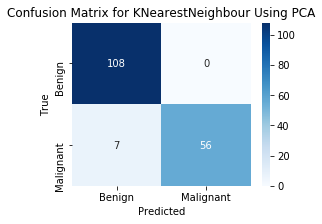

In [22]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_validation, y_pred_knn)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], 
            yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for KNearestNeighbour Using PCA");


Prediction accuracy for the standardized test dataset with PCA -KNN
95.91%


PC 1 with:
 [0.22840435 0.11459603 0.23535896 0.23006804 0.13287554 0.23665125
 0.25728371 0.26063846 0.12980642 0.04072285 0.20668039 0.01403714
 0.21082108 0.20303925 0.00920246 0.16404168 0.15189164 0.17759851
 0.02342551 0.09062191 0.23340006 0.1129634  0.24101228 0.22996358
 0.12075504 0.20839579 0.23202745 0.24934109 0.11715877 0.12319076]

PC 2 with:
 [-0.21279079 -0.06584905 -0.1951508  -0.20926326  0.19756295  0.16214611
  0.06508838 -0.02336025  0.19063184  0.37857151 -0.09065476  0.10210316
 -0.07890224 -0.13730365  0.22275577  0.25267161  0.21665334  0.15427451
  0.18942265  0.30374253 -0.2080996  -0.06010889 -0.18944108 -0.20663622
  0.16229606  0.13041973  0.08349775 -0.01238619  0.10660055  0.27448168]


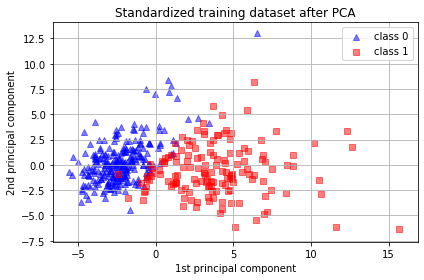

In [23]:
FIG_SIZE = (10, 7)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_knn.fit(X_train, y_train)
pred_test_std = pipe_knn.predict(X_validation)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA -KNN')
print('{:.2%}\n'.format(metrics.accuracy_score(y_validation, pred_test_std)))

# Extract PCA from pipeline
pca_std = pipe_knn.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_knn.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset after PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()

plt.show()

Applying dimensionality Reduction using Principal Component Analysis [PCA]
Best parameter NB (CV score=0.930):
{'pca__n_components': 5}


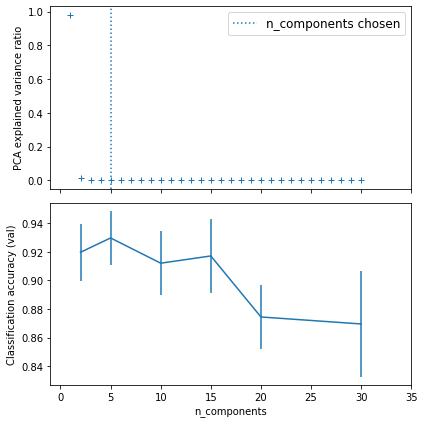

In [24]:
print('Applying dimensionality Reduction using Principal Component Analysis [PCA]')
from sklearn.naive_bayes import GaussianNB


#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model3 = GaussianNB()

pipe_NB = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model3)])


# set parameters of pipelines using ‘__’ separated parameter names:

param_grid = {"pca__n_components": [2,5,10,15,20,30],
              }


search = GridSearchCV(pipe_NB, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_NB = search.fit(X_train, y_train)
#Get Best Parameters
print("Best parameter NB (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 35)

plt.tight_layout()
plt.show()


In [25]:
#----------Test Best Parameters---------
t0 = time()
clf_NB =clf_NB.best_estimator_
y_pred_NB = clf_NB.predict(X_validation)
print("Done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cv_NB = cross_val_score(clf_NB, X_train, y_train, cv=cv)

scores = cross_val_score(clf_NB, X_validation, y_validation, scoring='roc_auc', cv=cv, n_jobs=-1)


Done in 0.004s


In [26]:
#---------Classification report--------
print ("----------------------> [Naive Bayes Classifier performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred_NB, y_validation)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_NB.mean(),
                                          scores_cv_NB.std()),
                                          end="\n\n" )
print(confusion_matrix(y_validation,y_pred_NB))
print(classification_report(y_validation,y_pred_NB))
print('Mean ROC AUC: %.3f' % scores.mean(), end="\n\n")
print('Misclassified examples: %d' % (y_validation != y_pred_NB).sum())
print('Misclassification/Error rate: %.3f' % ((y_validation != y_pred_NB).sum()/y_pred_NB.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_NB.score(X_validation, y_validation)))
print("Training set Accuracy: {:.3f}".format(clf_NB.score(X_train, y_train)))
print('--------------- Naive Bayes Classifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [Naive Bayes Classifier performance summary]
Accuracy: 0.930
mean: 0.931 (std: 0.041)

[[105   3]
 [  9  54]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       108
           1       0.95      0.86      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171

Mean ROC AUC: 0.975

Misclassified examples: 12
Misclassification/Error rate: 0.211 %
Test set Accuracy: 0.930
Training set Accuracy: 0.935
--------------- Naive Bayes Classifier --Parameters specified-- : classifier.fit [Done]


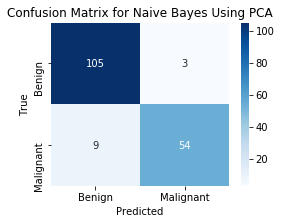

In [27]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_validation, y_pred_NB)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], 
            yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Naive Bayes Using PCA");


Prediction accuracy for the standardized test dataset with PCA -NB
85.38%


PC 1 with:
 [0.22840435 0.11459603 0.23535896 0.23006804 0.13287554 0.23665125
 0.25728371 0.26063846 0.12980642 0.04072285 0.20668039 0.01403714
 0.21082108 0.20303925 0.00920246 0.16404168 0.15189164 0.17759851
 0.02342551 0.09062191 0.23340006 0.1129634  0.24101228 0.22996358
 0.12075504 0.20839579 0.23202745 0.24934109 0.11715877 0.12319076]

PC 2 with:
 [-0.21279079 -0.06584905 -0.1951508  -0.20926326  0.19756295  0.16214611
  0.06508838 -0.02336025  0.19063184  0.37857151 -0.09065476  0.10210316
 -0.07890224 -0.13730365  0.22275577  0.25267161  0.21665334  0.15427451
  0.18942265  0.30374253 -0.2080996  -0.06010889 -0.18944108 -0.20663622
  0.16229606  0.13041973  0.08349775 -0.01238619  0.10660055  0.27448168]


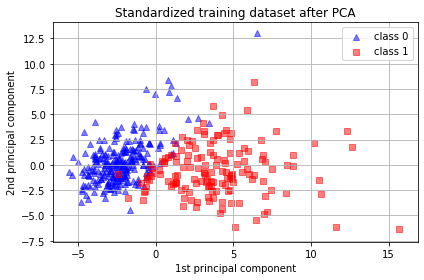

In [28]:
FIG_SIZE = (10, 7)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_NB.fit(X_train, y_train)
pred_test_std = pipe_NB.predict(X_validation)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA -NB')
print('{:.2%}\n'.format(metrics.accuracy_score(y_validation, pred_test_std)))

# Extract PCA from pipeline
pca_std = pipe_NB.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_NB.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset after PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()

plt.show()

Applying dimensionality Reduction using Principal Component Analysis [PCA]
Best parameter (CV score=0.980):
{'m__C': 100, 'm__gamma': 0.001, 'm__kernel': 'rbf', 'pca__n_components': 10}


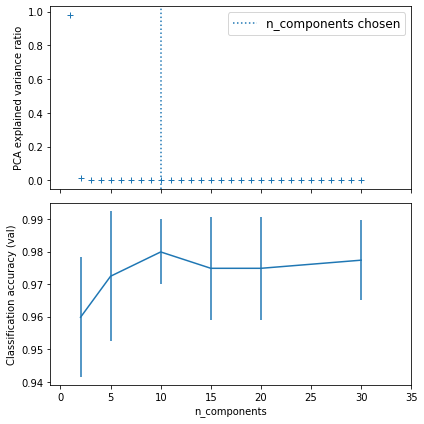

In [29]:
print('Applying dimensionality Reduction using Principal Component Analysis [PCA]')
from sklearn.svm import SVC

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model4 = SVC(probability=True)

pipe_svc = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model4)])


# set parameters of pipelines using ‘__’ separated parameter names:
param_grid = [{"pca__n_components": [2,5,10,15,20,30],
              'm__kernel': ['rbf'], 'm__gamma': [1e-3, 1e-4],
              'm__C': [1, 10,100,1000]},
              {'m__kernel': ['linear'], 'm__C': [1, 10,100,1000]}]

search = GridSearchCV(pipe_svc, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_svc = search.fit(X_train, y_train)
#Get Best Parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 35)

plt.tight_layout()
plt.show()


In [30]:
#----------Test Best Parameters---------
t0 = time()
clf_svc =clf_svc.best_estimator_
y_pred_svc = clf_svc.predict(X_validation)
print("Done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cv_svc = cross_val_score(clf_svc, X_train, y_train, cv=cv)

scores = cross_val_score(clf_svc, X_validation, y_validation, scoring='roc_auc', cv=cv, n_jobs=-1)


Done in 0.009s


In [31]:
#---------Classification report--------
print ("----------------------> [Support Vector performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred_svc, y_validation)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_svc.mean(),
                                          scores_cv_svc.std()),
                                          end="\n\n" )
print(confusion_matrix(y_validation,y_pred_svc))
print(classification_report(y_validation,y_pred_svc))
print('Mean ROC AUC: %.3f' % scores.mean(), end="\n\n")
print('Misclassified examples: %d' % (y_validation != y_pred_svc).sum())
print('Misclassification/Error rate: %.3f' % ((y_validation != y_pred_svc).sum()/y_pred_svc.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_svc.score(X_validation, y_validation)))
print("Training set Accuracy: {:.3f}".format(clf_svc.score(X_train, y_train)))
print('--------------- Support Vector Classifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [Support Vector performance summary]
Accuracy: 0.971
mean: 0.977 (std: 0.018)

[[107   1]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Mean ROC AUC: 0.995

Misclassified examples: 5
Misclassification/Error rate: 0.083 %
Test set Accuracy: 0.971
Training set Accuracy: 0.985
--------------- Support Vector Classifier --Parameters specified-- : classifier.fit [Done]


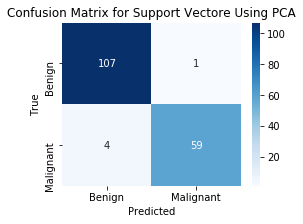

In [32]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_validation, y_pred_svc)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], 
            yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Support Vectore Using PCA");


Prediction accuracy for the standardized test dataset with PCA -SVC
97.08%


PC 1 with:
 [0.22840435 0.11459603 0.23535896 0.23006804 0.13287554 0.23665125
 0.25728371 0.26063846 0.12980642 0.04072285 0.20668039 0.01403714
 0.21082108 0.20303925 0.00920246 0.16404168 0.15189164 0.17759851
 0.02342551 0.09062191 0.23340006 0.1129634  0.24101228 0.22996358
 0.12075504 0.20839579 0.23202745 0.24934109 0.11715877 0.12319076]

PC 2 with:
 [-0.21279079 -0.06584905 -0.1951508  -0.20926326  0.19756295  0.16214611
  0.06508838 -0.02336025  0.19063184  0.37857151 -0.09065476  0.10210316
 -0.07890224 -0.13730365  0.22275577  0.25267161  0.21665334  0.15427451
  0.18942265  0.30374253 -0.2080996  -0.06010889 -0.18944108 -0.20663622
  0.16229606  0.13041973  0.08349775 -0.01238619  0.10660055  0.27448168]


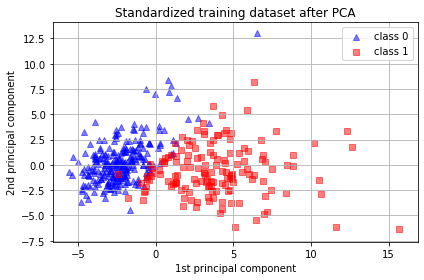

In [33]:
FIG_SIZE = (10, 7)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_svc.fit(X_train, y_train)
pred_test_std = pipe_svc.predict(X_validation)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA -SVC')
print('{:.2%}\n'.format(metrics.accuracy_score(y_validation, pred_test_std)))

# Extract PCA from pipeline
pca_std = pipe_svc.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_svc.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset after PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()

plt.show()

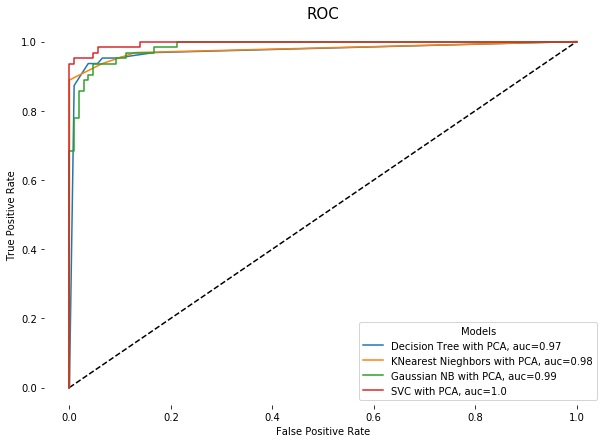

In [34]:
# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
import sklearn.metrics as metrics

y_pred_DT = clf_dt.predict_proba(X_validation)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_validation,  y_pred_DT)
auc1 = metrics.roc_auc_score(y_validation, y_pred_DT)

y_pred_kNN =  clf_knn.predict_proba(X_validation)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_validation,  y_pred_kNN)
auc2 = metrics.roc_auc_score(y_validation, y_pred_kNN)

y_pred_NB = clf_NB.predict_proba(X_validation)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_validation,  y_pred_NB)
auc3 = metrics.roc_auc_score(y_validation, y_pred_NB)

y_pred_svc =  clf_svc.predict_proba(X_validation)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_validation,  y_pred_svc)
auc4 = metrics.roc_auc_score(y_validation,y_pred_svc)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Decision Tree with PCA, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="KNearest Nieghbors with PCA, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Gaussian NB with PCA, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="SVC with PCA, auc="+str(round(auc4,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

--------------- DecisionTreeClassifier --Learning Curve-- : [Done]


C:\Users\Ramatu's PC\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Ramatu's PC\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


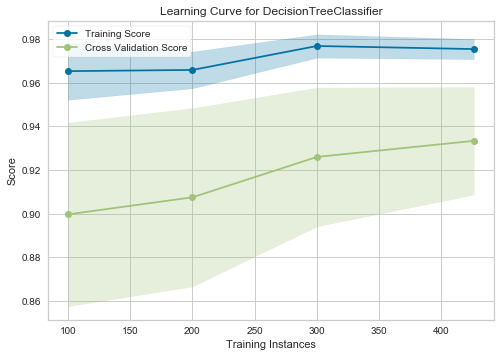

In [35]:
print('--------------- DecisionTreeClassifier --Learning Curve-- : [Done]')
from yellowbrick.model_selection import LearningCurve
sizes = [1, 100, 200, 300, 426]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_dt, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, Y )        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

--------------- KNeighboursClassifier --Learning Curve-- : [Done]


C:\Users\Ramatu's PC\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


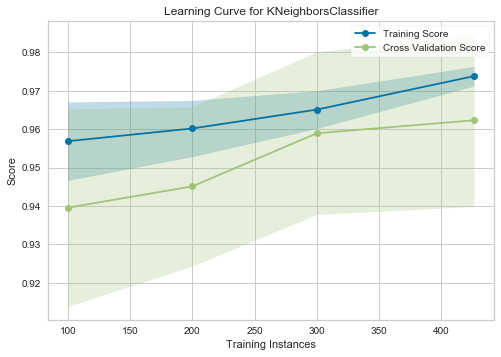

In [36]:
print('--------------- KNeighboursClassifier --Learning Curve-- : [Done]')
from yellowbrick.model_selection import LearningCurve
sizes = [1, 100, 200, 300, 426]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_knn, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, Y )        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

--------------- Naive Bayes Classifier --Learning Curve-- : [Done]


C:\Users\Ramatu's PC\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


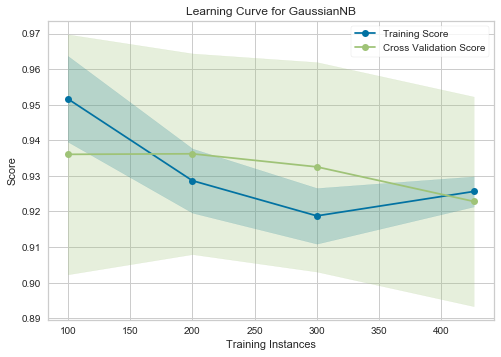

In [37]:
print('--------------- Naive Bayes Classifier --Learning Curve-- : [Done]')
from yellowbrick.model_selection import LearningCurve
sizes = [1, 100, 200, 300, 426]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_NB, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, Y )        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

--------------- Support Vector Classifier --Learning Curve-- : [Done]


C:\Users\Ramatu's PC\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


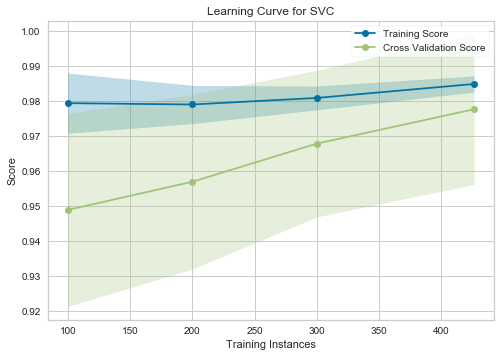

In [38]:
print('--------------- Support Vector Classifier --Learning Curve-- : [Done]')
from yellowbrick.model_selection import LearningCurve
sizes = [1, 100, 200, 300, 426]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_svc, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, Y )        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [39]:
# ===========================================================================
#                              [k-means]
# ===========================================================================

# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

#scale the dataset using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# keep the first ten principal components of the data
pca = PCA(n_components=10, random_state=0)
# fit PCA model to breast cancer data
pca.fit(X)
# transform data onto the first ten principal components
X_pca = pca.transform(X)

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state = 0)
y_kmeans = kmeans.fit_predict(X_pca)
print("Cluster memberships:\n{}".format(y_kmeans))
print("Cluster sizes k-means: {}".format(np.bincount(y_kmeans)))

# Get the cluster centroids
print("Cluster Centers:\n{}".format(kmeans.cluster_centers_))


Cluster memberships:
[1 1 1 2 1 2 1 2 2 2 0 2 1 0 2 2 0 2 1 0 0 0 2 1 1 1 2 1 2 1 1 2 1 1 2 2 2
 0 0 2 0 2 1 2 0 1 0 2 0 0 0 0 0 1 0 0 1 2 0 0 0 0 2 0 2 2 0 0 2 0 1 2 2 0
 0 1 0 1 1 0 0 2 1 1 0 1 0 1 0 2 0 0 0 0 2 1 0 0 0 2 0 0 0 0 0 2 0 0 1 0 0
 2 2 0 0 0 0 2 2 0 0 1 1 0 0 0 0 1 2 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 2 2 0
 0 0 0 2 2 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 2 0 0 0 2 2 0 0 1 1 0 0 0
 0 0 0 0 0 2 0 0 2 2 0 2 1 1 2 0 1 1 2 0 0 0 0 2 0 1 0 1 2 2 2 2 0 1 1 0 0
 0 2 0 0 0 0 0 2 2 0 0 1 0 0 1 1 0 1 0 0 2 0 1 0 0 2 0 0 1 0 1 0 1 0 1 2 1
 2 1 0 1 0 1 1 0 0 0 2 0 0 1 0 0 0 0 0 0 0 1 0 1 2 0 0 0 0 2 0 2 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 1 0 0 0 0 2 2 2 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 2 1 2 0 0 2 0 0 0 0 0 0 0 0 1 1 0 1 1
 2 0 1 1 0 0 2 0 0 2 0 0 0 2 0 0 0 0 2 1 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 2 0 1 1 0 2 0 0 0 0 2 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0 0 1 2 0 0 0 0 0 0 0 0 0 2 0
 0 0

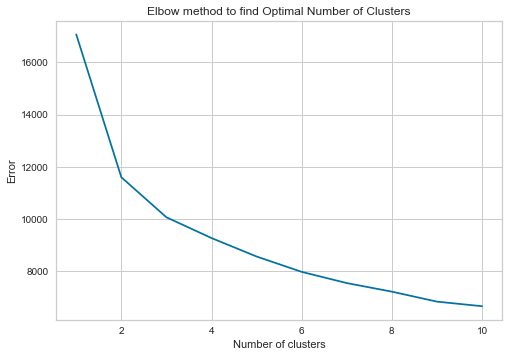

In [40]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method to find Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

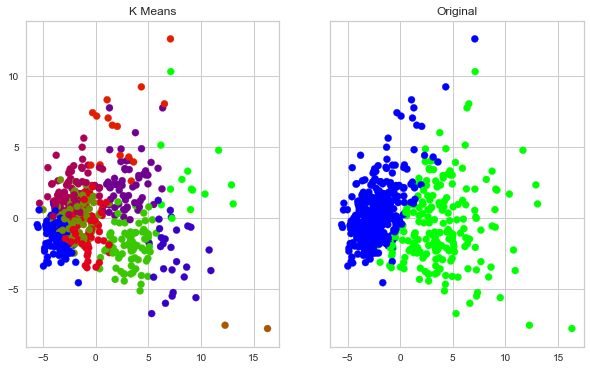

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax2.set_title("Original")
ax2.scatter(X_pca[:,0],X_pca[:,1],c=Y,cmap='brg')
ax1.set_title('K Means')
ax1.scatter(X_pca[:,0],X_pca[:,1],c=kmeans.labels_,cmap='brg')
